In [1]:
import copy
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, roc_curve, auc, log_loss
from kmodes.kmodes import KModes

In [2]:
df = pd.read_csv('all500.csv')

In [260]:
exp = pd.read_csv('experiment.csv')

In [262]:
exp.dtypes

Unnamed: 0     int64
earned         int64
headline      object
hours          int64
jobs           int64
rate          object
skills        object
dtype: object

In [3]:
df = df.drop(['Unnamed: 0'], axis=1)

In [4]:
df.shape

(4920, 6)

In [5]:
df.dtypes

earned      object
headline    object
hours       object
jobs        object
rate        object
skills      object
dtype: object

In [6]:
df = df.drop_duplicates()

In [7]:
df.shape

(3642, 6)

In [8]:
type(df.skills.iloc[7])

str

In [9]:
for i in df.skills.index:
    if type(df.skills.loc[i]) == float:
        df.skills.loc[i] = '[]'

In [10]:
df = df.dropna()

In [11]:
df.shape

(3299, 6)

In [12]:
df = df.drop(['earned'], axis=1)

In [13]:
df['rate'] = df['rate'].map(lambda string: float(''.join([c for c in string if c.isdigit()]))/100)

In [14]:
df['hours'] = df['hours'].map(lambda string: int(''.join([c for c in string if c.isdigit()])))

In [15]:
df['jobs'] = df['jobs'].map(lambda string: int(''.join([c for c in string if c.isdigit()])))

In [16]:
df['skills'] = df['skills'].map(lambda string: string.replace('[', ""))

In [17]:
df['skills'] = df['skills'].map(lambda string: string.replace(']', ""))

In [18]:
df['skills'] = df['skills'].map(lambda string: string.replace("'", ""))

In [19]:
df['skills'] = df['skills'].map(lambda string: string.replace('"', ''))

In [20]:
df['skills'] = df['skills'].map(lambda string: string.split(", "))

In [21]:
for i in df.skills.index:
    if df.skills.loc[i] == ['']:
        df.skills.loc[i] = []

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [22]:
df.shape

(3299, 5)

In [121]:
df = df[df.rate < 200]

In [124]:
df.shape

(3272, 5)

In [122]:
y = df.rate
y = y.values

Text(0.5,1,'Rates')

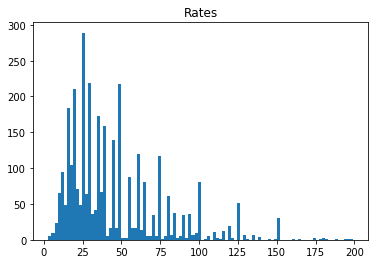

In [123]:
plt.hist(y, bins = 100)
plt.title('Rates')

In [125]:
meany = np.mean(y)
meany

44.951372249388754

In [126]:
std = np.std(y)
std

30.906068588425825

In [127]:
skills_df = df['skills'].str.join('|').str.get_dummies()

In [128]:
df.shape

(3272, 5)

In [129]:
sum(skills_df.iloc[0, :])

10

In [130]:
skills_df.head()

,.NET Framework,.NET Remoting,2D Animation,2D Design,3D Animation,3D Design,3D Modeling,3D Printing,3D Rendering,3D Rigging,...,iOS Development,iPad App Development,iPad UI Design,iPhone App Development,iPhone UI Design,insightly,jQuery,mobi,phpMyAdmin,webERP
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
km = KModes(n_clusters=12, init='Huang', n_init=6, verbose=1)
clusters = km.fit_predict(skills_df)
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 415, cost: 23683.0
Run 1, iteration: 2/100, moves: 0, cost: 23683.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 97, cost: 24012.0
Run 2, iteration: 2/100, moves: 19, cost: 24012.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 161, cost: 24228.0
Run 3, iteration: 2/100, moves: 56, cost: 24228.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 319, cost: 23777.0
Run 4, iteration: 2/100, moves: 9, cost: 23777.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 203, cost: 24047.0
Run 5, iteration: 2/100, moves: 0, cost: 24047.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1

In [142]:
kmodes = km.cluster_centroids_
shape = kmodes.shape

In [143]:
for i in range(shape[0]):
    if sum(kmodes[i,:]) == 0:
        print("\ncluster " + str(i) + ": ")
        print("no-skills cluster")
    else:
        print("\ncluster " + str(i) + ": ")
        cent = kmodes[i,:]
        for j in skills_df.columns[np.nonzero(cent)]:
            print(j)


cluster 0: 
Adobe Photoshop

cluster 1: 
no-skills cluster

cluster 2: 
Adobe Illustrator
Adobe InDesign
Adobe Photoshop
Graphic Design
Logo Design

cluster 3: 
Translation English Spanish
Translation Spanish English

cluster 4: 
Project Management

cluster 5: 
Adobe Illustrator
Adobe InDesign
Adobe Photoshop

cluster 6: 
Illustration
Logo Design

cluster 7: 
Facebook Marketing
Instagram Marketing
Social Media Marketing
Twitter Marketing

cluster 8: 
Editing

cluster 9: 
Microsoft Excel

cluster 10: 
Article Writing
Blog Writing
Content Writing
Copywriting

cluster 11: 
Accounting
Bookkeeping
Intuit QuickBooks
Microsoft Excel


In [144]:
clust_assigned = km.predict(skills_df)

In [145]:
unique, counts = np.unique(clust_assigned, return_counts=True)
dict(zip(unique, counts))

{0: 194,
 1: 1855,
 2: 83,
 3: 18,
 4: 192,
 5: 58,
 6: 14,
 7: 44,
 8: 302,
 9: 277,
 10: 155,
 11: 80}

In [ ]:
restrict = copy.deepcopy(skills_df)
for name in restrict.columns:
    if sum(restrict[name]) < 50:
        restrict = restrict.drop([name], axis = 1)

In [ ]:
restrict.head()

In [ ]:
km2 = KModes(n_clusters=15, init='Huang', n_init=11, verbose=1)
clusters = km2.fit_predict(restrict)
print(km2.cluster_centroids_)

In [ ]:
kmodes2 = km2.cluster_centroids_
shape2 = kmodes2.shape

In [ ]:
for i in range(shape2[0]):
    if sum(kmodes2[i,:]) == 0:
        print("\ncluster " + str(i) + ": ")
        print("no-skills cluster")
    else:
        print("\ncluster " + str(i) + ": ")
        cent = kmodes2[i,:]
        for j in restrict.columns[np.nonzero(cent)]:
            print(j)

In [ ]:
clust_assigned2 = km2.predict(restrict)

In [ ]:
unique2, counts2 = np.unique(clust_assigned2, return_counts=True)
dict(zip(unique2, counts2))

In [146]:
df.shape

(3272, 5)

In [147]:
for_box = np.stack((clust_assigned, y), axis = 1)

In [148]:
box_df = pd.DataFrame(for_box)

In [149]:
box_df.columns = ['cluster', 'rate']

(0, 200)

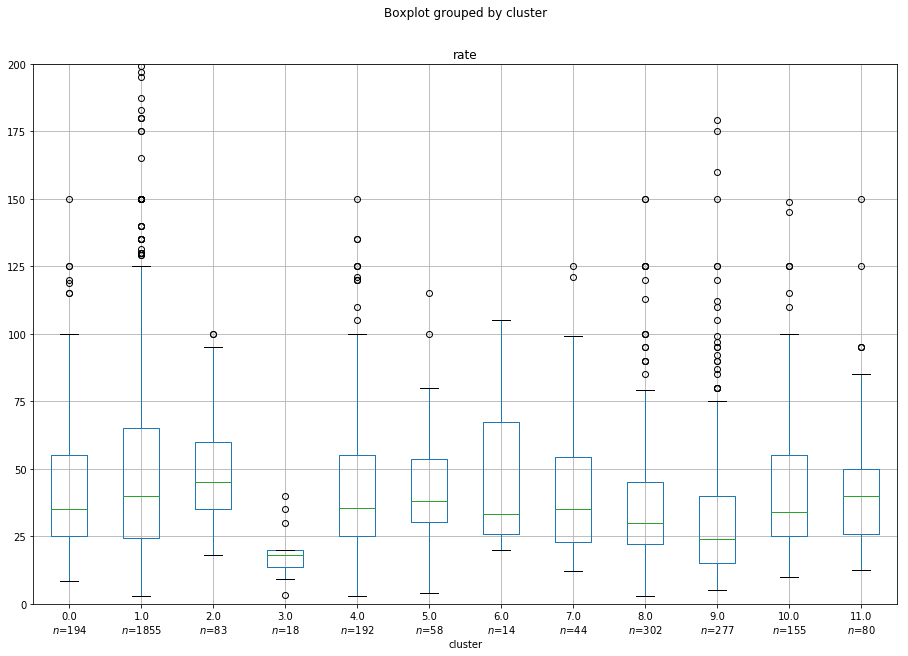

In [150]:
dfg = box_df.groupby('cluster')
counts = [len(v) for k, v in dfg]
total = float(sum(counts))
cases = len(counts)
widths = [c/total for c in counts]  
cax = box_df.boxplot(column='rate', by='cluster', figsize=(15,10))
cax.set_xticklabels(['%s\n$n$=%d'%(k, len(v)) for k, v in dfg])
cax.set_ylim([0,200])

In [151]:
box_means = dfg.mean()

In [152]:
df.shape

(3272, 5)

In [153]:
y_and_cluster_means = pd.merge(box_means, box_df, how='inner', on='cluster', left_on=None, right_on=None,
         left_index=False, right_index=True, sort=False,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [154]:
y_and_cluster_means.head()

,rate_x,rate_y
cluster,,
0.0,43.177216,150.0
0.0,43.177216,99.0
0.0,43.177216,25.0
0.0,43.177216,60.0
0.0,43.177216,25.0


In [155]:
r2_score(y_and_cluster_means.rate_y, y_and_cluster_means.rate_x)

0.027404609512185485

In [156]:
df.shape

(3272, 5)

In [157]:
X = df.drop(['rate'], axis = 1)

In [158]:
X.skills = X.skills.map(lambda li: len(li))

In [159]:
X.head()

,headline,hours,jobs,skills
0,Consulting Enterprise Requirements Build & Dev...,666,45,10
1,Legal Secretary and also Artist/Filmmaker/Writer,324,31,5
3,Web Freelancer,848,44,10
4,Full Stack Developer,2282,37,10
5,Social Media Marketing / Community Building / ...,7855,50,10


In [160]:
fn = lambda row: len(row.headline) # define a function for the new column
X = X.assign(head_len = X.apply(fn, axis=1).values)

In [161]:
X.head()

,headline,hours,jobs,skills,head_len
0,Consulting Enterprise Requirements Build & Dev...,666,45,10,58
1,Legal Secretary and also Artist/Filmmaker/Writer,324,31,5,48
3,Web Freelancer,848,44,10,14
4,Full Stack Developer,2282,37,10,20
5,Social Media Marketing / Community Building / ...,7855,50,10,67


In [162]:
fn = lambda row: len(row.headline.split(' ')) # define a function for the new column
X = X.assign(head_num_words = X.apply(fn, axis=1).values)

In [163]:
X.head()

,headline,hours,jobs,skills,head_len,head_num_words
0,Consulting Enterprise Requirements Build & Dev...,666,45,10,58,7
1,Legal Secretary and also Artist/Filmmaker/Writer,324,31,5,48,5
3,Web Freelancer,848,44,10,14,2
4,Full Stack Developer,2282,37,10,20,3
5,Social Media Marketing / Community Building / ...,7855,50,10,67,10


In [164]:
X = X.drop(['headline'], axis = 1)

In [165]:
X.head()

,hours,jobs,skills,head_len,head_num_words
0,666,45,10,58,7
1,324,31,5,48,5
3,848,44,10,14,2
4,2282,37,10,20,3
5,7855,50,10,67,10


In [166]:
X.shape

(3272, 5)

In [167]:
clust = pd.Series(clust_assigned)

In [168]:
clust.shape

(3272,)

In [169]:
X = X.reset_index(drop = True)

In [170]:
result = pd.concat([X, clust], axis = 1, sort = False, ignore_index = True)

In [171]:
result.shape

(3272, 6)

In [172]:
result.head()

,0,1,2,3,4,5
0,666,45,10,58,7,1
1,324,31,5,48,5,1
2,848,44,10,14,2,4
3,2282,37,10,20,3,1
4,7855,50,10,67,10,1


In [173]:
result.columns = ['hours', 'jobs', 'skills', 'head_len', 'head_num_words', 'cluster']

In [174]:
result.dtypes

hours             int64
jobs              int64
skills            int64
head_len          int64
head_num_words    int64
cluster           uint8
dtype: object

In [175]:
result.head()

,hours,jobs,skills,head_len,head_num_words,cluster
0,666,45,10,58,7,1
1,324,31,5,48,5,1
2,848,44,10,14,2,4
3,2282,37,10,20,3,1
4,7855,50,10,67,10,1


In [176]:
result_dum = pd.get_dummies(result, columns = ['cluster'])

In [177]:
result_dum.head()

,hours,jobs,skills,head_len,head_num_words,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11
0,666,45,10,58,7,0,1,0,0,0,0,0,0,0,0,0,0
1,324,31,5,48,5,0,1,0,0,0,0,0,0,0,0,0,0
2,848,44,10,14,2,0,0,0,0,1,0,0,0,0,0,0,0
3,2282,37,10,20,3,0,1,0,0,0,0,0,0,0,0,0,0
4,7855,50,10,67,10,0,1,0,0,0,0,0,0,0,0,0,0


In [178]:
result_dum.shape

(3272, 17)

In [190]:
min(result_dum.jobs)

1

In [241]:
tr = DecisionTreeRegressor(max_depth = 5)
trmodel = tr.fit(result_dum, y)

In [242]:
trmodel.score(result_dum, y)

0.12305403467470664

In [243]:
np.mean(cross_val_score(trmodel, result_dum, y, scoring = 'r2', cv = 4))

0.009948555413998167

In [244]:
np.sqrt(-1*np.mean(cross_val_score(trmodel, result_dum, y, scoring = 'neg_mean_squared_error', cv = 4)))

30.76037555067376

In [245]:
rf = RandomForestRegressor(n_estimators = 500, max_depth = 5)
rfmodel = rf.fit(result_dum, y)

In [246]:
rfmodel.score(result_dum, y)

0.1612978815458459

In [247]:
np.mean(cross_val_score(rfmodel, result_dum, y, scoring = 'r2', cv = 4))

0.07768798865167689

In [248]:
np.sqrt(-1*np.mean(cross_val_score(rfmodel, result_dum, y, scoring = 'neg_mean_squared_error', cv = 4)))

29.68755680277322

In [187]:
ada = AdaBoostRegressor(n_estimators = 10000, learning_rate = 0.01)
adamodel = ada.fit(result_dum, y)

In [188]:
adamodel.score(result_dum, y)

-0.019472956222365445

In [ ]:
np.mean(cross_val_score(adamodel, result_dum, y, scoring = 'r2', cv = 4))

In [ ]:
np.sqrt(-1*np.mean(cross_val_score(adamodel, result_dum, y, scoring = 'neg_mean_squared_error', cv = 4)))

In [ ]:
scaler = StandardScaler()
data_std = scaler.fit_transform(X)
data_std = pd.DataFrame(data_std)
data_std.columns = list(X)

In [ ]:
data_std

In [ ]:
max_hours = max(X.hours)
min_hours = min(X.hours)
max_jobs = max(X.jobs)
min_jobs = min(X.jobs)
max_skills = max(X.skills)
min_skills = min(X.skills)

In [ ]:
min_skills

In [ ]:
X.hours = X.hours.map(lambda h: (h - min_hours)/(max_hours - min_hours))

In [ ]:
X.jobs = X.jobs.map(lambda h: (h - min_jobs)/(max_jobs - min_jobs))

In [ ]:
X.skills = X.skills.map(lambda h: (h - min_skills)/(max_skills - min_skills))

In [ ]:
X.head()

In [ ]:
vals = StandardScaler().fit_transform(X)

In [203]:
parameters = {'metric':('jaccard', 'matching', 'dice', 'kulsinski', 'rogerstanimoto', 'russellrao', 
                        'sokalmichener', 'sokalsneath'), 'n_neighbors':[2, 10, 25, 50, 100]}

In [204]:
neigh = KNeighborsRegressor()
reg = GridSearchCV(neigh, parameters, cv = 4, scoring = 'neg_mean_squared_error')
reg.fit(result_dum, y) 

GridSearchCV(cv=4, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'metric': ('jaccard', 'matching', 'dice', 'kulsinski', 'rogerstanimoto', 'russellrao', 'sokalmichener', 'sokalsneath'), 'n_neighbors': [2, 10, 25, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [205]:
bestknn = reg.best_params_

In [206]:
bestknn

{'metric': 'jaccard', 'n_neighbors': 100}

In [209]:
knnbest = KNeighborsRegressor(n_neighbors = bestknn['n_neighbors'], metric = bestknn['metric'])
np.sqrt(-1*np.mean(cross_val_score(knnbest, result_dum, y, scoring = 'neg_mean_squared_error', cv = 4)))

30.555796122611476

In [210]:
np.mean(cross_val_score(knnbest, result_dum, y, scoring = 'r2', cv = 4))

0.022453669742918292

In [253]:
ridgeReg = Ridge(alpha=100)

In [254]:
ridgeReg.fit(result_dum, y)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [255]:
coef = pd.Series(ridgeReg.coef_, result_dum.columns).sort_values()

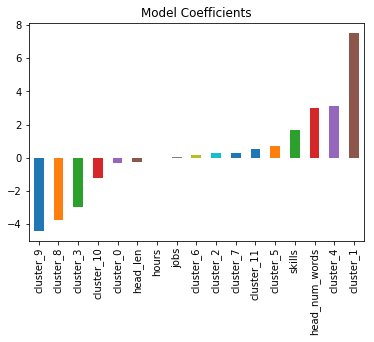

In [256]:
coef.plot(kind='bar', title='Model Coefficients')

In [257]:
cv = 10
m = cross_val_score(Ridge(alpha=.0001), result_dum, y, scoring = 'r2', cv = cv)

In [258]:
m

array([0.07568368, 0.10442256, 0.10531076, 0.12597448, 0.0518213 ,
       0.05997411, 0.05020823, 0.06988905, 0.09886338, 0.09109077])

In [259]:
np.mean(m)

0.0833238316272794

In [ ]:
LR = LinearRegression()

In [ ]:
model = LR.fit(new_X, y)

In [ ]:
model.score(new_X,y)

In [ ]:
y_pred = model.predict(new_X)

In [ ]:
min(model.coef_)

In [ ]:
model.intercept_

In [ ]:
d = {'names' : new_names, 'coefs' : model.coef_}

In [ ]:
FI = pd.DataFrame(d)

In [ ]:
sorted_FI = FI.sort_values(by=['coefs'])

In [ ]:
sorted_FI

In [ ]:
np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
r2_score(y, y_pred)

In [ ]:
plt.hist(X[:,0], bins = 20)
plt.title('Hours Worked')

In [ ]:
plt.hist(X[:,1], bins = 20)
plt.title('Jobs Done')

In [ ]:
plt.hist(X[:,2], bins = 20)
plt.title('Number of Skills')

In [ ]:
XT = X.T

In [ ]:
new_XT = new_X.T

In [ ]:
prod = XT @ X

In [ ]:
new_prod = new_XT @ new_X

In [ ]:
inv = np.linalg.inv(prod)

In [ ]:
new_inv = np.linalg.inv(new_prod)

In [ ]:
triple_X = inv @ XT

In [ ]:
theta = triple_X @ y

In [ ]:
preds = [theta @ X[i,:] for i in range(len(y))]

In [ ]:
err = [(y[i] - preds[i])for i in range(len(y))]

In [ ]:
theta2 = theta*1.1

In [ ]:
preds2 = [theta2 @ X[i,:] for i in range(len(y))]
err2 = [(y[i] - preds2[i]) for i in range(len(y))]

In [ ]:
RMSE = (sum([e**2 for e in err])/len(y))**0.5
RMSE2 = (sum([e**2 for e in err2])/len(y))**0.5

In [ ]:
RMSE, RMSE2

In [ ]:
RMSE2 - RMSE

In [ ]:
results = sm.OLS(y, X).fit()

In [ ]:
print(list(zip(list(names),list(theta/100))))

In [ ]:
print(results.summary())